# Zillow Prize : Zillow's Home Value Prediction
- 'Zestimate'라는 기관에서 지난 11년간 각 재산에 대한 데이터
- [참고한 캐글 커널](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.options.display.float_format = lambda x: f'{x:.3f}'

In [2]:
#train 데이터 로드
train_df = pd.read_csv('Desktop/zillow/train_2016_v2.csv')

In [3]:
train_df.head()
#logerror가 예측해야 하는 값임.

,parcelid,logerror,transactiondate
0,11016594,0.028,2016-01-01
1,14366692,-0.168,2016-01-01
2,12098116,-0.004,2016-01-01
3,12643413,0.022,2016-01-02
4,14432541,-0.005,2016-01-02


In [5]:
#특징 데이터 로드
prop_df = pd.read_csv('Desktop/zillow/properties_2016.csv')
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.000,NaN,NaN,NaN,NaN,NaN,NaN,34144442.000,-118654084.000,85768.000,NaN,NaN,NaN,NaN,NaN,010D,269.000,NaN,60378002.041,37688.000,3101.000,NaN,96337.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000,2015.000,9.000,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.000,NaN,NaN,NaN,NaN,NaN,NaN,34140430.000,-118625364.000,4083.000,NaN,NaN,NaN,NaN,NaN,0109,261.000,LCA11*,60378001.011,37688.000,3101.000,NaN,96337.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.000,2015.000,27516.000,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,73026.000,NaN,NaN,73026.000,NaN,NaN,6037.000,NaN,NaN,NaN,NaN,NaN,NaN,33989359.000,-118394633.000,63085.000,NaN,NaN,NaN,NaN,NaN,1200,47.000,LAC2,60377030.012,51617.000,3101.000,NaN,96095.000,0.000,NaN,NaN,NaN,2.000,NaN,NaN,NaN,NaN,NaN,650756.000,1413387.000,2015.000,762631.000,20800.370,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.000,0.000,3.000,7.000,NaN,NaN,NaN,5068.000,NaN,NaN,5068.000,NaN,NaN,6037.000,NaN,NaN,NaN,NaN,NaN,NaN,34148863.000,-118437206.000,7521.000,NaN,NaN,NaN,NaN,NaN,1200,47.000,LAC2,60371412.023,12447.000,3101.000,27080.000,96424.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,1948.000,1.000,NaN,571346.000,1156834.000,2015.000,585488.000,14557.570,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.000,0.000,4.000,NaN,NaN,NaN,NaN,1776.000,NaN,NaN,1776.000,NaN,NaN,6037.000,NaN,NaN,NaN,NaN,NaN,NaN,34194168.000,-118385816.000,8512.000,NaN,NaN,NaN,NaN,NaN,1210,31.000,LAM1,60371232.052,12447.000,3101.000,46795.000,96450.000,0.000,NaN,NaN,NaN,1.000,NaN,NaN,1947.000,NaN,NaN,193796.000,433491.000,2015.000,239695.000,5725.170,NaN,NaN,NaN


### 3.8 다른 정형 데이터와의 결합

In [7]:
#3.8 다른 정형 데이터와의 결합 예시가 될 수 있음.
#parcelid 기준으로 train과 properites data를 merge함.

train_df = pd.merge(train_df, prop_df, on = 'parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.028,2016-01-01,1.000,NaN,NaN,2.000,3.000,NaN,4.000,2.000,NaN,NaN,1684.000,1684.000,NaN,NaN,NaN,NaN,6037.000,NaN,2.000,NaN,NaN,NaN,2.000,34280990.000,-118488536.000,7528.000,NaN,NaN,NaN,NaN,NaN,0100,261.000,LARS,60371066.461,12447.000,3101.000,31817.000,96370.000,0.000,NaN,NaN,NaN,1.000,NaN,NaN,1959.000,NaN,NaN,122754.000,360170.000,2015.000,237416.000,6735.880,NaN,NaN,60371066461001.000
1,14366692,-0.168,2016-01-01,NaN,NaN,NaN,3.500,4.000,NaN,NaN,3.500,NaN,NaN,2263.000,2263.000,NaN,NaN,NaN,NaN,6059.000,NaN,3.000,2.000,468.000,NaN,NaN,33668120.000,-117677556.000,3643.000,NaN,NaN,NaN,NaN,NaN,1,261.000,NaN,60590524.222,32380.000,1286.000,NaN,96962.000,0.000,NaN,1.000,NaN,NaN,NaN,NaN,2014.000,NaN,NaN,346458.000,585529.000,2015.000,239071.000,10153.020,NaN,NaN,NaN
2,12098116,-0.004,2016-01-01,1.000,NaN,NaN,3.000,2.000,NaN,4.000,3.000,NaN,NaN,2217.000,2217.000,NaN,NaN,NaN,NaN,6037.000,NaN,3.000,NaN,NaN,NaN,2.000,34136312.000,-118175032.000,11423.000,NaN,NaN,NaN,NaN,NaN,0100,261.000,PSR6,60374638.003,47019.000,3101.000,275411.000,96293.000,0.000,NaN,NaN,NaN,1.000,NaN,NaN,1940.000,NaN,NaN,61994.000,119906.000,2015.000,57912.000,11484.480,NaN,NaN,60374638003004.000
3,12643413,0.022,2016-01-02,1.000,NaN,NaN,2.000,2.000,NaN,4.000,2.000,NaN,NaN,839.000,839.000,NaN,NaN,NaN,NaN,6037.000,NaN,2.000,NaN,NaN,NaN,2.000,33755800.000,-118309000.000,70859.000,NaN,NaN,NaN,NaN,NaN,010C,266.000,LAR3,60372963.002,12447.000,3101.000,54300.000,96222.000,0.000,NaN,NaN,NaN,1.000,NaN,NaN,1987.000,NaN,NaN,171518.000,244880.000,2015.000,73362.000,3048.740,NaN,NaN,60372963002002.000
4,14432541,-0.005,2016-01-02,NaN,NaN,NaN,2.500,4.000,NaN,NaN,2.500,NaN,NaN,2283.000,2283.000,NaN,NaN,NaN,NaN,6059.000,NaN,2.000,2.000,598.000,NaN,NaN,33485643.000,-117700234.000,6000.000,1.000,NaN,NaN,NaN,1.000,122,261.000,NaN,60590423.381,17686.000,1286.000,NaN,96961.000,8.000,NaN,1.000,NaN,NaN,NaN,NaN,1981.000,2.000,NaN,169574.000,434551.000,2015.000,264977.000,5488.960,NaN,NaN,60590423381006.000


### 3.9 집약하여 통계량 구하기

In [9]:
#3.9.1 단순 통계량 구하기 예시가 될 수 있음.
#카운트(행 데이터 수)
#단순하게 parcelid가 몇 행 있는지 확인
print(len(train_df['parcelid']))

90275


In [10]:
#두 파일의 변수 데이터 타입을 확인
pd.options.display.max_rows = 118

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,object
3,airconditioningtypeid,float64
4,architecturalstyletypeid,float64
5,basementsqft,float64
6,bathroomcnt,float64
7,bedroomcnt,float64
8,buildingclasstypeid,float64
9,buildingqualitytypeid,float64


In [11]:
#3.9.5의 예시가 될 수 있음. 
#그룹화 하여 특징 생성

#데이터 타입 별로 count
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,53
2,object,6


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

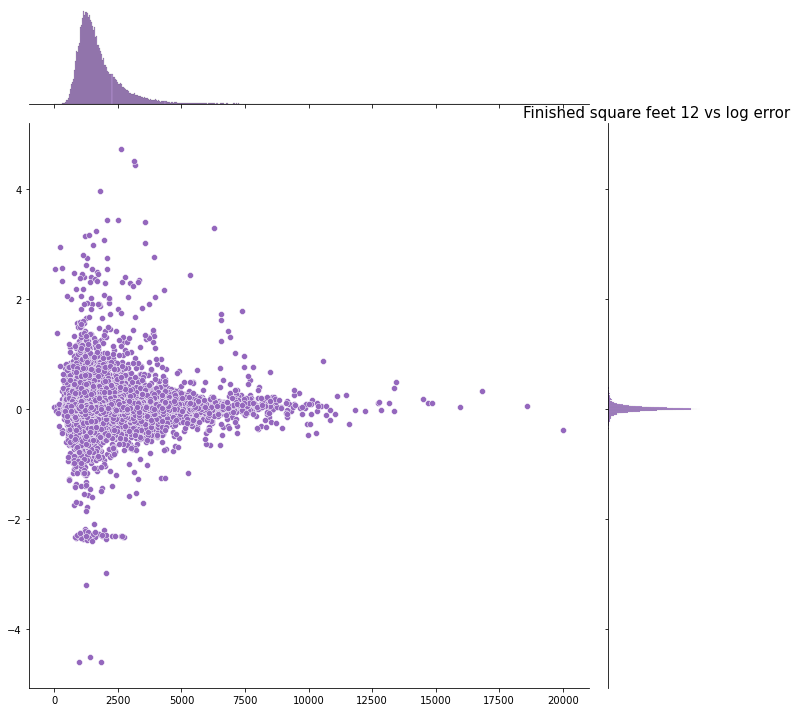

In [12]:
#특정 데이터 'finishesquarefeet12'인 평방 비트 12 변수에 주목
col = "finishedsquarefeet12"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col][train_df[col] > ulimit] = ulimit
train_df[col][train_df[col] < llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.finishedsquarefeet12.values, y=train_df.logerror.values,
             size = 10, color=color[4])
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 vs log error", fontsize = 15)
plt.show()

### 3.7 변수의 조합

In [13]:
#3.7 예시를 위해 방의 개수를 합쳐볼 예정

#먼저 화장실의 수를 파악
train_df['bathroomcnt'].head()

0   2.000
1   3.500
2   3.000
3   2.000
4   2.500
Name: bathroomcnt, dtype: float64

In [14]:
#침실 의 수를 파악
train_df['bedroomcnt'].head()

0   3.000
1   4.000
2   2.000
3   2.000
4   4.000
Name: bedroomcnt, dtype: float64

In [15]:
#결측값이 있다면 제거
train_df = train_df[np.isfinite(train_df['bathroomcnt'])]
train_df = train_df[np.isfinite(train_df['bedroomcnt'])]

In [20]:
#수치형 변수x수치형 의 변수의 조합 예시로 화장실의 수와 침실의 수를 더함.
#방의 개수를 파악하기 위함.
train_df['rooms_cnt'] = train_df['bathroomcnt'] + train_df['bedroomcnt']
train_df['rooms_cnt']

0       5.000
1       7.500
2       5.000
3       4.000
4       6.500
         ... 
90270   2.000
90271   6.000
90272   6.000
90273   4.000
90274   4.000
Name: rooms_cnt, Length: 90275, dtype: float64

In [21]:
train_df.head()
#train_df에 방의 개수 칼럼이 추가된 것을 볼 수 있음.

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,rooms_cnt
0,11016594,0.028,2016-01-01,1.000,NaN,NaN,2.000,3.000,NaN,4.000,2.000,NaN,NaN,1684.000,1684.000,NaN,NaN,NaN,NaN,6037.000,NaN,2.000,NaN,NaN,NaN,2.000,34280990.000,-118488536.000,7528.000,NaN,NaN,NaN,NaN,NaN,0100,261.000,LARS,60371066.461,12447.000,3101.000,31817.000,96370.000,0.000,NaN,NaN,NaN,1.000,NaN,NaN,1959.000,NaN,NaN,122754.000,360170.000,2015.000,237416.000,6735.880,NaN,NaN,60371066461001.000,5.000
1,14366692,-0.168,2016-01-01,NaN,NaN,NaN,3.500,4.000,NaN,NaN,3.500,NaN,NaN,2263.000,2263.000,NaN,NaN,NaN,NaN,6059.000,NaN,3.000,2.000,468.000,NaN,NaN,33668120.000,-117677556.000,3643.000,NaN,NaN,NaN,NaN,NaN,1,261.000,NaN,60590524.222,32380.000,1286.000,NaN,96962.000,0.000,NaN,1.000,NaN,NaN,NaN,NaN,2014.000,NaN,NaN,346458.000,585529.000,2015.000,239071.000,10153.020,NaN,NaN,NaN,7.500
2,12098116,-0.004,2016-01-01,1.000,NaN,NaN,3.000,2.000,NaN,4.000,3.000,NaN,NaN,2217.000,2217.000,NaN,NaN,NaN,NaN,6037.000,NaN,3.000,NaN,NaN,NaN,2.000,34136312.000,-118175032.000,11423.000,NaN,NaN,NaN,NaN,NaN,0100,261.000,PSR6,60374638.003,47019.000,3101.000,275411.000,96293.000,0.000,NaN,NaN,NaN,1.000,NaN,NaN,1940.000,NaN,NaN,61994.000,119906.000,2015.000,57912.000,11484.480,NaN,NaN,60374638003004.000,5.000
3,12643413,0.022,2016-01-02,1.000,NaN,NaN,2.000,2.000,NaN,4.000,2.000,NaN,NaN,839.000,839.000,NaN,NaN,NaN,NaN,6037.000,NaN,2.000,NaN,NaN,NaN,2.000,33755800.000,-118309000.000,70859.000,NaN,NaN,NaN,NaN,NaN,010C,266.000,LAR3,60372963.002,12447.000,3101.000,54300.000,96222.000,0.000,NaN,NaN,NaN,1.000,NaN,NaN,1987.000,NaN,NaN,171518.000,244880.000,2015.000,73362.000,3048.740,NaN,NaN,60372963002002.000,4.000
4,14432541,-0.005,2016-01-02,NaN,NaN,NaN,2.500,4.000,NaN,NaN,2.500,NaN,NaN,2283.000,2283.000,NaN,NaN,NaN,NaN,6059.000,NaN,2.000,2.000,598.000,NaN,NaN,33485643.000,-117700234.000,6000.000,1.000,NaN,NaN,NaN,1.000,122,261.000,NaN,60590423.381,17686.000,1286.000,NaN,96961.000,8.000,NaN,1.000,NaN,NaN,NaN,NaN,1981.000,2.000,NaN,169574.000,434551.000,2015.000,264977.000,5488.960,NaN,NaN,60590423381006.000,6.500
